📊 Step 1: Load and Prepare the Data

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('AirPassengers.csv')

# Rename columns to fit Prophet's expected format
df = df.rename(columns={'Month': 'ds', '#Passengers': 'y'})
df['ds'] = pd.to_datetime(df['ds'])


🧪 Step 2: Split the Data (80% Train, 20% Test)

In [3]:
# Determine split point
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

🔮 Step 3: Fit the Prophet Model

In [4]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/bge3nr2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/fco71tgu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1215', 'data', 'file=/tmp/tmpk4mwq2aq/bge3nr2r.json', 'init=/tmp/tmpk4mwq2aq/fco71tgu.json', 'output', 'file=/tmp/tmpk4mwq2aq/prophet_model6b9wob2l/prophet_model-20250703011946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📅 Step 4: Forecast into the Future (same length as test)

In [5]:
# Create future dataframe to cover test period
future = model.make_future_dataframe(periods=len(test), freq='MS')  # Monthly Start freq
forecast = model.predict(future)

📈 Step 5: Visualize the Forecast

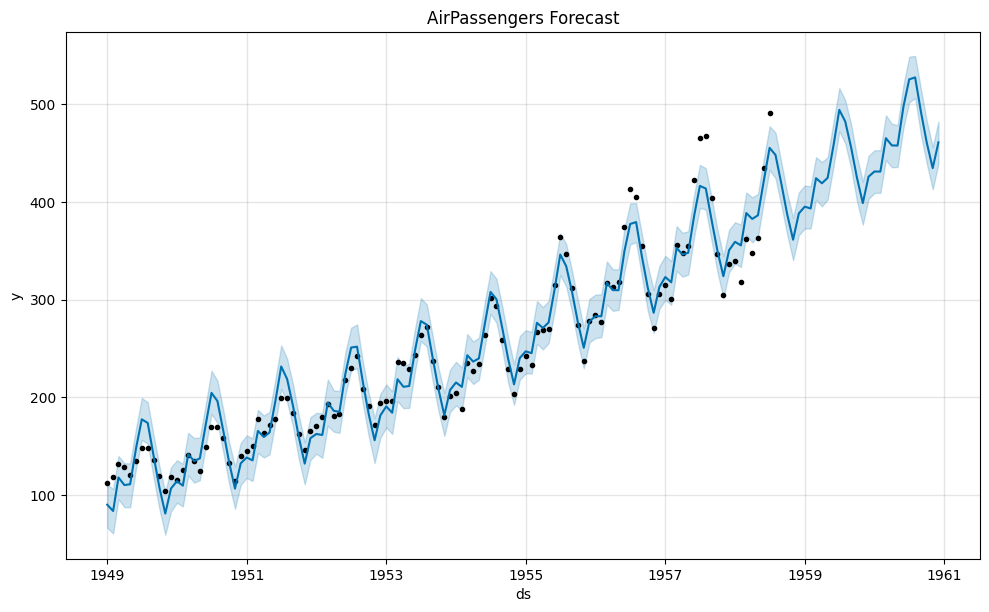

In [6]:
import matplotlib.pyplot as plt

# Plot the full forecast
model.plot(forecast)
plt.title('AirPassengers Forecast')
plt.show()


✅ Step 6: Evaluate the Model

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract forecast for the test period
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):].reset_index(drop=True)

# Compare predicted vs actual
actual = test.reset_index(drop=True)
mae = mean_absolute_error(actual['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(actual['y'], forecast_test['yhat']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 33.89
RMSE: 41.33


🔄 **Extend the Forecast by 12 Periods**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/ml_cfq1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/spxj7_ke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34743', 'data', 'file=/tmp/tmpk4mwq2aq/ml_cfq1g.json', 'init=/tmp/tmpk4mwq2aq/spxj7_ke.json', 'output', 'file=/tmp/tmpk4mwq2aq/prophet_modeliquec6dp/prophet_model-20250703013027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:30:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:30:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


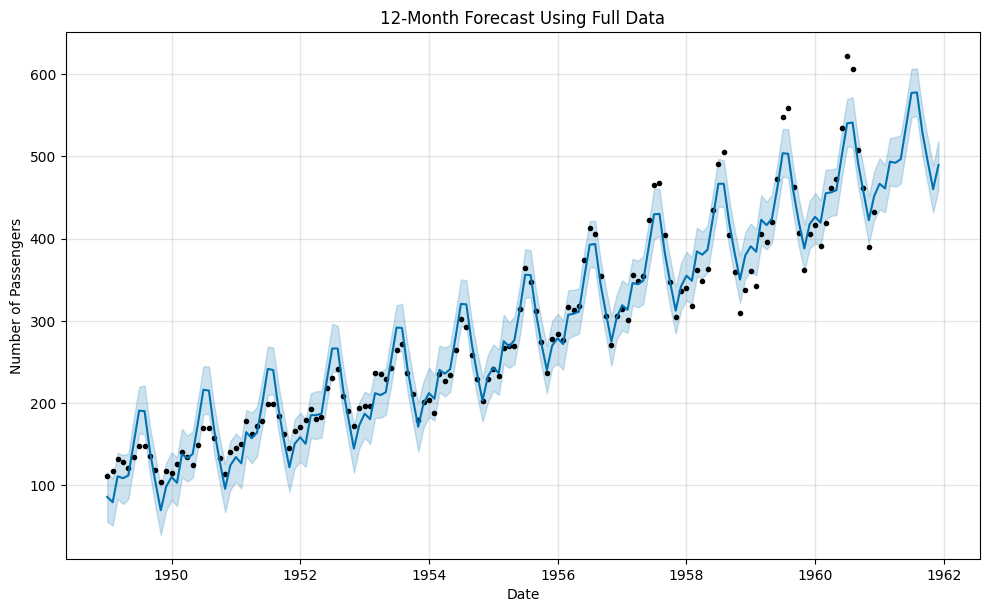

In [35]:
from prophet import Prophet

# Initialize and train
model = Prophet()
model.fit(df)

# Create a dataframe with 12 future months
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

import matplotlib.pyplot as plt

# Plot forecast
fig = model.plot(forecast)
plt.title('12-Month Forecast Using Full Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [36]:

# Display last 12 rows for predictions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
144,1961-01-01,466.580334,435.194039,497.745757
145,1961-02-01,461.044102,432.170202,489.270957
146,1961-03-01,493.466326,464.862951,522.259336
147,1961-04-01,492.147189,462.952421,523.403386
148,1961-05-01,496.479026,467.032217,525.374710
149,1961-06-01,537.590421,508.759951,565.303306
150,1961-07-01,577.157685,546.977098,606.587161
151,1961-08-01,577.583651,549.250131,606.431187
152,1961-09-01,529.024494,500.330449,556.697008
153,1961-10-01,493.867634,466.485835,522.888028


### Predictions for next 5 years

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/rejmpi92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/7e_gg1j1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79265', 'data', 'file=/tmp/tmpk4mwq2aq/rejmpi92.json', 'init=/tmp/tmpk4mwq2aq/7e_gg1j1.json', 'output', 'file=/tmp/tmpk4mwq2aq/prophet_modeljbamdal6/prophet_model-20250703013159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:31:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:31:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


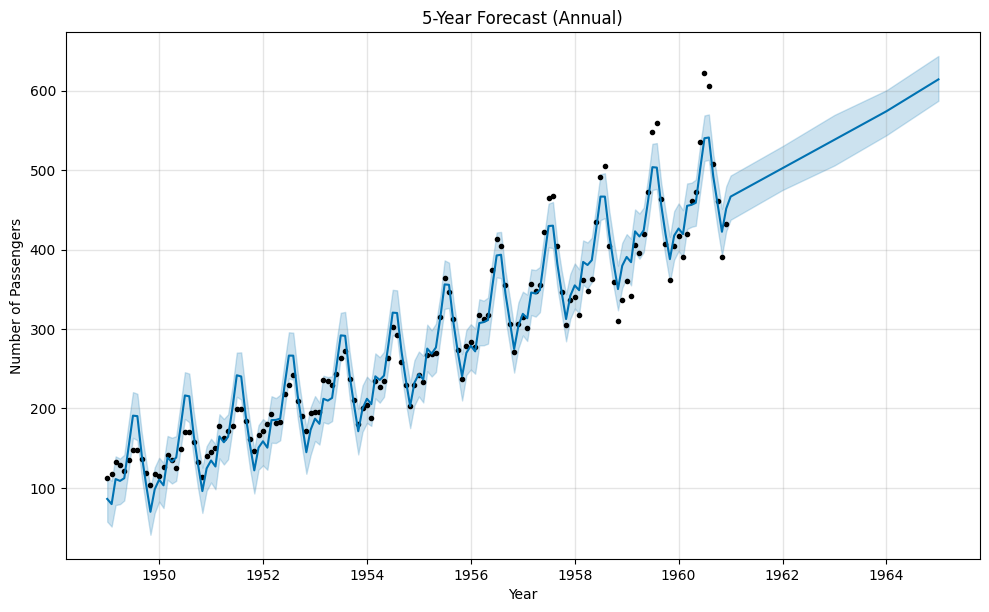

In [37]:
from prophet import Prophet

model = Prophet()
model.fit(df)

# Create a future dataframe with yearly frequency
future = model.make_future_dataframe(periods=5, freq='YS')  # Year Start frequency
forecast = model.predict(future)

import matplotlib.pyplot as plt

# Plot forecast
fig = model.plot(forecast)
plt.title('5-Year Forecast (Annual)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/owrbqbpx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4mwq2aq/_2k9dyck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61565', 'data', 'file=/tmp/tmpk4mwq2aq/owrbqbpx.json', 'init=/tmp/tmpk4mwq2aq/_2k9dyck.json', 'output', 'file=/tmp/tmpk4mwq2aq/prophet_modeln6c64vqz/prophet_model-20250703013245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


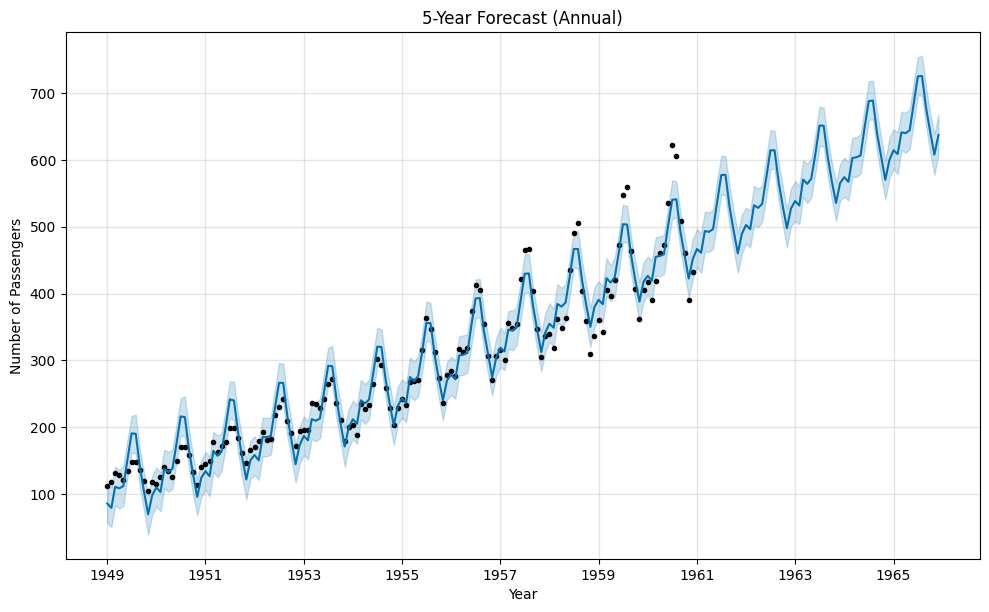

In [38]:
from prophet import Prophet

model = Prophet()
model.fit(df)

# Create a future dataframe with yearly frequency
future = model.make_future_dataframe(periods=60, freq='MS')  # Year Start frequency
forecast = model.predict(future)

import matplotlib.pyplot as plt

# Plot forecast
fig = model.plot(forecast)
plt.title('5-Year Forecast (Annual)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()
